# Exercise 10: Zipf's law
In this exercise we will create two bar plots with the 100 most frequently occuring words of a contemporary spoken English corpus and a corpus of the prosaic English of Shakespeare from exercise 5. We will try to find out if both of the plots correspond to Zipf's law.

First, we install matplotlib:

In [2]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 67.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Second, we load both of the corpora before we pre-process them like we did in exercise-9.

In [3]:
import os
def traverse_directory(path):
    return [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

#files = traverse_directory(corpus_path) 
#print(files[:15])

In [4]:
contemp_spoken = traverse_directory(os.path.join("", "..", "exercise-10", "corpus"))
print((contemp_spoken[0]))
shakespeare = traverse_directory(os.path.join("", "..", "exercise-5", "corpus"))
print((shakespeare[0]))

../exercise-10/corpus/tv_text.txt
../exercise-5/corpus/henry-vi-part-2_TXT_FolgerShakespeare.txt


For the pre-processing, we first tokenize and normalize the files; second, we want to count the tokens in order to be able to compare the frequencies afterwards. 

In [15]:
def tokenize_file(path):
  tokens = ""
  with open(path, 'r') as f:
    tokens = f.read()
    
  tokens_as_list = tokens.lower().split()
  normalized_tokens = []
  
  for token in tokens_as_list:
    normalized_token = ''.join(char for char in token if char.isalnum())
    if normalized_token != "":
      normalized_tokens.append(normalized_token)
  
  return normalized_tokens

In [16]:
def compute_counts(pathlist):
  counts = {}
  for path in pathlist:
    tokens = tokenize_file(path)
   
    for token in tokens:
      if token in counts:
        counts[token] = counts[token] + 1
      else:
        counts[token] = 1
  return counts

In [17]:
counts_contemp = compute_counts(contemp_spoken)
counts_shakespeare = compute_counts(shakespeare)

#counts = compute_counts(contemp_spoken)
#print(list(counts.items())[:15])

Next, we want to sort the counts according to their rank and print them:

In [18]:
def sort_counts(counts):
  sorted_tuples = sorted(counts.items(), key=lambda item: item[1], reverse=True)
  return sorted_tuples

In [19]:
sorted_counts_shakespeare = sort_counts(counts_shakespeare)
print(sorted_counts_shakespeare[0])
sorted_counts_contemp = sort_counts(counts_contemp)
print(sorted_counts_contemp[0])

('the', 29311)
('you', 80257)


In [20]:
def write_frequencies(frequencies, path):
  rank = 0
  sum = 0
  with open(path, 'w') as f:
    for word_type in frequencies:
      sum = sum + word_type[1]
  # TODO: open the file at path in write mode
    for word_type in frequencies:
      rank = rank + 1
      f.write(str(rank) + "," + str(word_type[0]) + "," + str(word_type[1]) + "," + str(word_type[1]/sum) + "\n") 

  return

In [21]:
write_frequencies(sorted_counts_shakespeare, 'frequencies.csv')
write_frequencies(sorted_counts_contemp, 'frequencies_contemp.csv')

In [22]:
def print_top_100(frequencies):
    rank = 1
    all_counts = 0
    for word_type in frequencies:
        all_counts = all_counts + word_type[1]

    print("Rank\t" + "Word_form\t" + "Count\t" + "Frequency\n")
    for word_type in frequencies:
        frequency = word_type[1]/all_counts
        print(str(rank) + "\t" + word_type[0] + "\t" + str(word_type[1]) + "\t" + str(frequency) + "\n")
        rank +=1
        if rank == 101:
            break
    return

print_top_100(sorted_counts_contemp)
print_top_100(sorted_counts_shakespeare)




Rank	Word_form	Count	Frequency

1	you	80257	0.03787955305553956

2	i	79931	0.03772568816779013

3	the	63211	0.029834212943340908

4	to	49195	0.023218966726482035

5	s	43624	0.020589576267426614

6	a	43471	0.020517363605384704

7	it	38809	0.01831700131493122

8	and	30474	0.014383063157288618

9	that	30242	0.014273564218767552

10	nt	27475	0.01296760058563053

11	of	25346	0.011962759033426439

12	do	23221	0.01095980539395547

13	is	20768	0.009802042910368512

14	in	20694	0.009767116524805757

15	we	19795	0.009342808138036627

16	what	19253	0.009086995962698621

17	me	17328	0.008178437959883742

18	this	16550	0.007811238933291547

19	he	16294	0.007690412518371751

20	for	14658	0.006918256210524925

21	have	14453	0.006821500682952431

22	was	14230	0.006716249548080889

23	on	14152	0.006679435249785014

24	my	13522	0.006382088994318327

25	m	13518	0.006380201081585205

26	no	12775	0.006029521291407826

27	re	12718	0.00600261853496084

28	your	12468	0.005884623989140726

29	not	12429	0.00586

Here, we define another function that returns the words and their frequencies of each corpus - this will create our two-dimensional list for the plots. 

In [23]:
def top_100(sorted_counts):
    all_counts = 0
    for item in sorted_counts:
        all_counts += item[1]
    
    count = 0
    words = []
    frequencies = []
    
    for item in sorted_counts:
        words.append(item[0])
        frequencies.append(item[1]/all_counts)
        count += 1
        if count == 100:
            break

    return words, frequencies


#top100(sorted_counts_contemp)

Now we can find out if the 100 most frequent words in contemporary spoken English and in the prosaic English of Shakespear correspond to Zipf's law. Zipf's law basically states that a small number of words are used all the time, while the vast majority are used very rarely. The most frequently used word is used about twice as frequent as the second most frequent word and so on. If all words are sorted by the frequency, the rank r of a word is its position in this sorting, with rank 1 being the most frequent word and so on. The probability that a word is used can thus be predicted as P(r) = 0.1 / r  (for the r < 1000). 

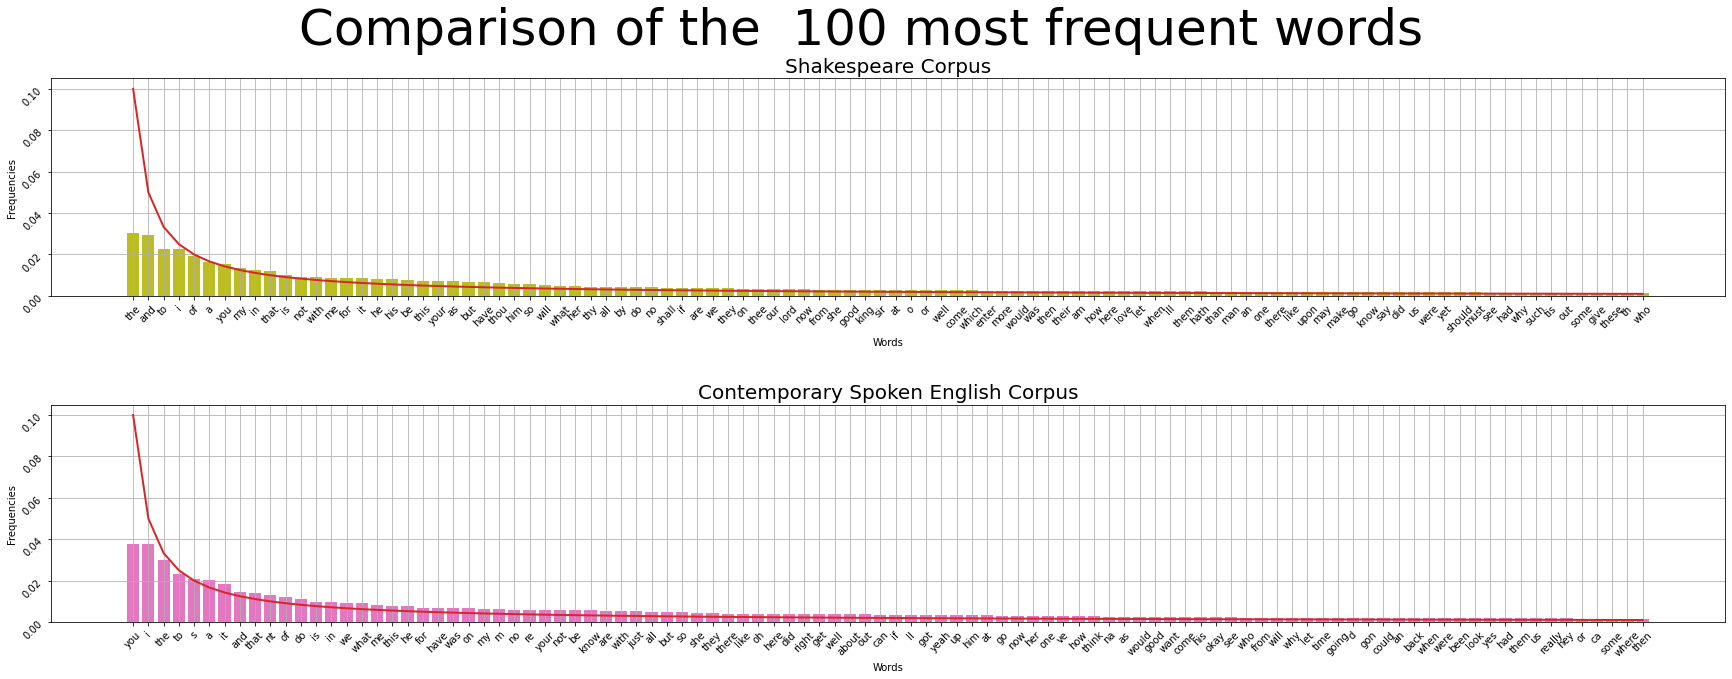

In [25]:
import matplotlib.pyplot as plt

words_shakespeare, frequencies_shakespeare = top_100(sorted_counts_shakespeare)
words_contemp, frequencies_contemp = top_100(sorted_counts_contemp)

ranks = range(1,101)
zipf = [0.1/rank for rank in ranks]

figure, ax = plt.subplots(2, 1, figsize=(30,10))
figure.suptitle("Comparison of the  100 most frequent words", fontsize=50)
plt.subplots_adjust(hspace=0.5)

ax[0].plot(words_shakespeare, zipf, c="tab:red", linewidth=2)
ax[0].bar(words_shakespeare, frequencies_shakespeare, color="tab:olive")
ax[0].set_xlabel("Words")
ax[0].set_ylabel("Frequencies")
ax[0].set_title("Shakespeare Corpus", size=20)
ax[0].tick_params(labelrotation=45)
ax[0].grid()


ax[1].plot(words_contemp, zipf, c="tab:red", linewidth=2)
ax[1].bar(words_contemp, frequencies_contemp, color="tab:pink")
ax[1].set_xlabel("Words")
ax[1].set_ylabel("Frequencies")
ax[1].set_title("Contemporary Spoken English Corpus", size=20)
ax[1].tick_params(labelrotation=45)
ax[1].grid()


plt.show()